In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [119]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [120]:
data = pd.read_csv(r'C:\Users\Hp\Desktop\dataset\Spotify_project\data (2).csv')
genre_data = pd.read_csv(r'C:\Users\Hp\Desktop\dataset\Spotify_project\data_by_genres.csv')
artist_data = pd.read_csv(r'C:\Users\Hp\Desktop\dataset\Spotify_project\data_by_artist.csv')
yaer_data = pd.read_csv(r'C:\Users\Hp\Desktop\dataset\Spotify_project\data_by_year.csv')

In [142]:
#print(data.isnull().sum())
#print(genre_data.isnull().sum())
#print(artist_data.isnull().sum())
#print(yaer_data.isnull().sum())

In [121]:
print('data', data.columns)
print('year', yaer_data.columns)
print('artist', artist_data.columns)
print('genre', genre_data.columns)

data Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')
year Index(['mode', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key'],
      dtype='object')
artist Index(['mode', 'count', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'key'],
      dtype='object')
genre Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')


In [122]:
# Create a decade column in data representing the decade of each track using apply() and a lambda function.
data['decade'] = data['year'].apply(lambda x: str(x)[:-1] + "0")

Text(0.5, 1.0, 'Track Count by Decade')

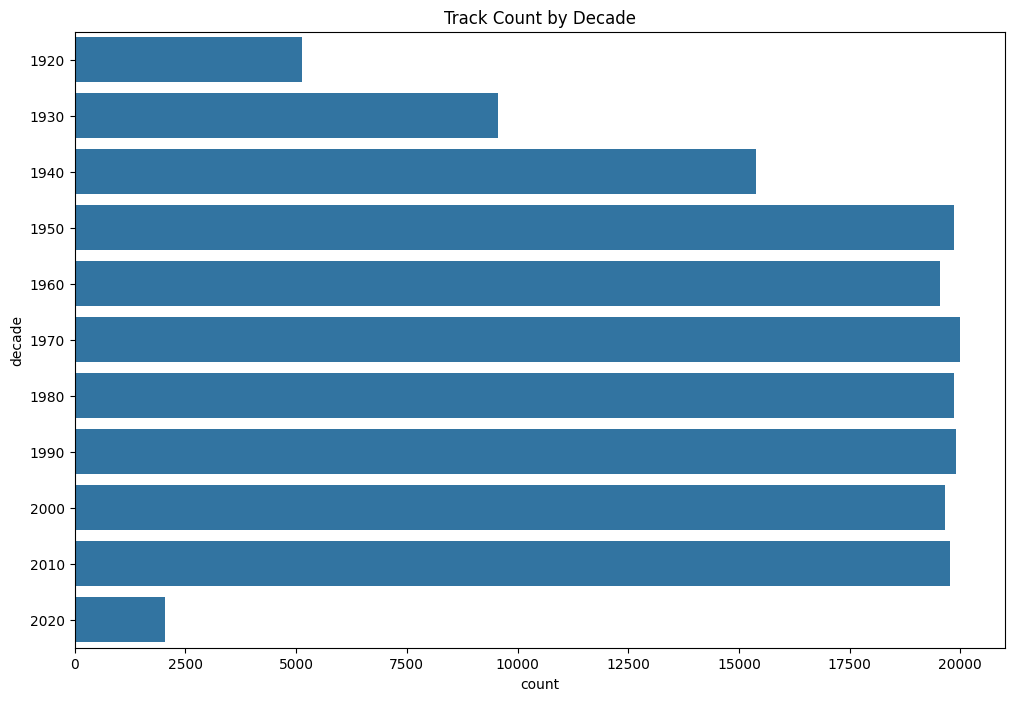

In [123]:
# Visualize the distribution of tracks across different decades using a count plot: sns.countplot(data['decade']).
%matplotlib inline
plt.figure(figsize=(12, 8))
sns.countplot(data['decade'])
plt.title('Track Count by Decade')


In [124]:
yaer_data.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


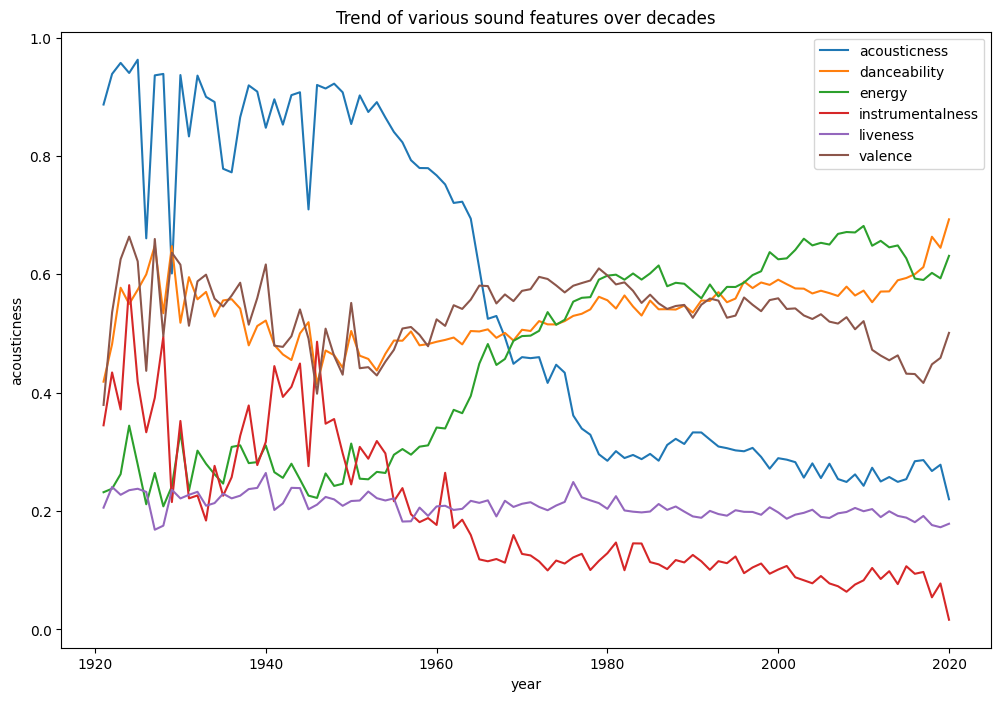

In [125]:
#Plot the trends of various sound features (acousticness, danceability, energy, instrumentalness, liveness, valence) over decades using a line plot: 
# px.line(year_data, x='year', y=sound_features, title='Trend of various sound features over decades').
plt.figure(figsize=(12, 8))
sns.lineplot(data=yaer_data, x='year', y='acousticness', label='acousticness')
sns.lineplot(data=yaer_data, x='year', y='danceability', label='danceability')
sns.lineplot(data=yaer_data, x='year', y='energy', label='energy')
sns.lineplot(data=yaer_data, x='year', y='instrumentalness', label='instrumentalness')
sns.lineplot(data=yaer_data, x='year', y='liveness', label='liveness')
sns.lineplot(data=yaer_data, x='year', y='valence', label='valence')
plt.title('Trend of various sound features over decades')
plt.show()

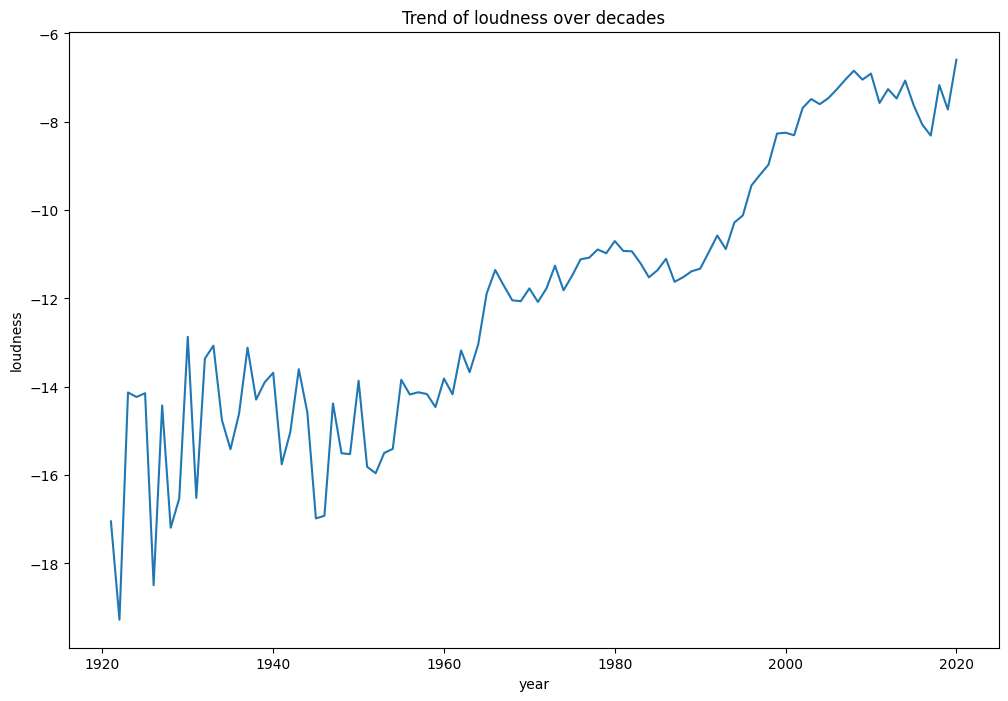

In [126]:
#Plot the trend of loudness over decades using a line plot: px.line(year_data, x='year', y='loudness', title='Trend of loudness over decades').
plt.figure(figsize=(12, 8))
sns.lineplot(data=yaer_data, x='year', y='loudness')
plt.title('Trend of loudness over decades')
plt.show()

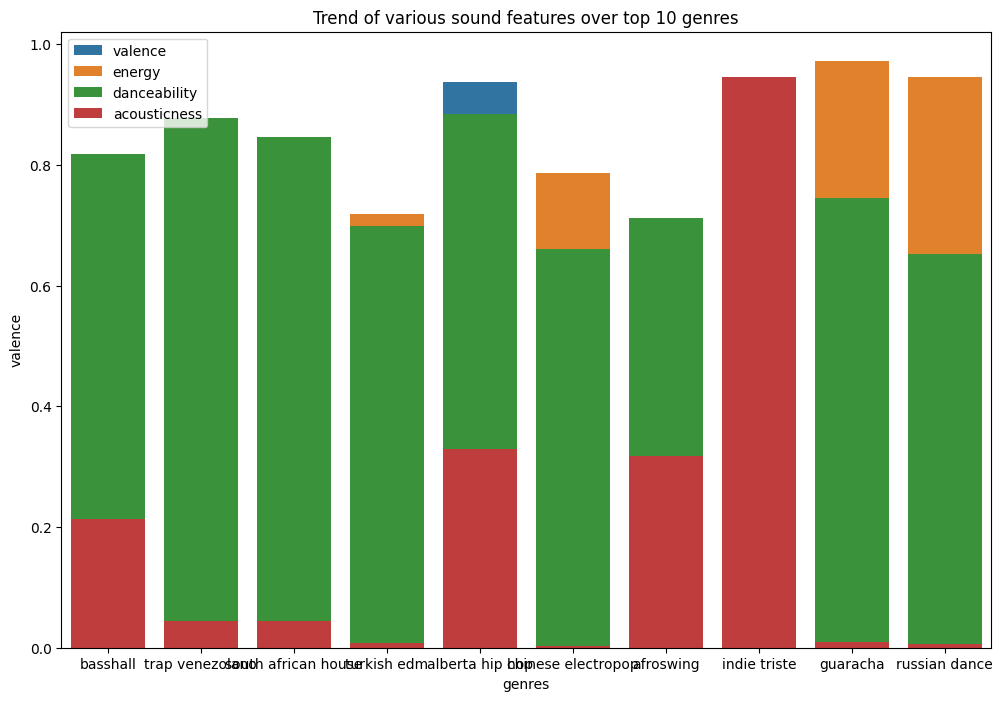

In [127]:
#dentify the top 10 genres based on popularity and plot the trends of various sound features (valence, energy, danceability, acousticness) for these genres using a grouped bar chart: px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group', title='Trend of various sound features over top 10 genres').
top10_genres = genre_data.sort_values('popularity', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top10_genres, x='genres', y='valence', label='valence')
sns.barplot(data=top10_genres, x='genres', y='energy', label='energy')
sns.barplot(data=top10_genres, x='genres', y='danceability', label='danceability')
sns.barplot(data=top10_genres, x='genres', y='acousticness', label='acousticness')
plt.title('Trend of various sound features over top 10 genres')
plt.show()


In [128]:
# With plotly express
# Identify the top 10 genres based on popularity
top10_genres = genre_data.sort_values('popularity', ascending=False).head(10)

# Plot the trends of various sound features using a grouped bar chart
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'],
             barmode='group', title='Trend of Various Sound Features Over Top 10 Genres',
             labels={'value': 'Score', 'genres': 'Genres'},
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

In [129]:
genre_copy = genre_data.copy()

In [130]:
# Generate a word cloud of the genres present in the dataset using the WordCloud library: WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, max_words=40, min_font_size=10).generate(comment_words)

# Combine all genres into a single string
comment_words = ' '.join(genre_copy['genres'])
# Define stopwords
stopwords = set(stopwords.words('english'))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      max_words=40,
                      min_font_size=10).generate(comment_words)


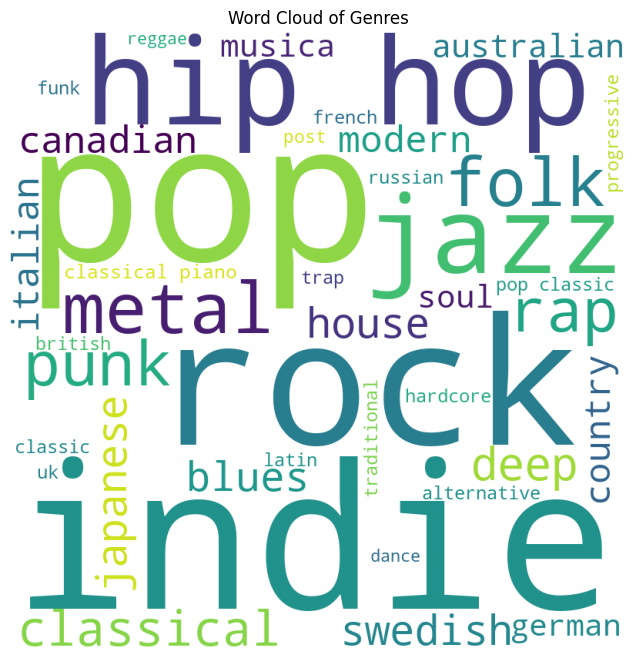

In [131]:
# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of Genres")
plt.show()


In [132]:
artist_copy = artist_data.copy()

In [133]:
# Generate a word cloud of the artists present in the dataset using the WordCloud library: WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_word_length=3, max_words=40, min_font_size=10).generate(comment_words).

# Combine all artists into a single string
comment_words = ' '.join(artist_copy['artists'])
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_word_length=3,
                      max_words=40,
                      min_font_size=10).generate(comment_words)


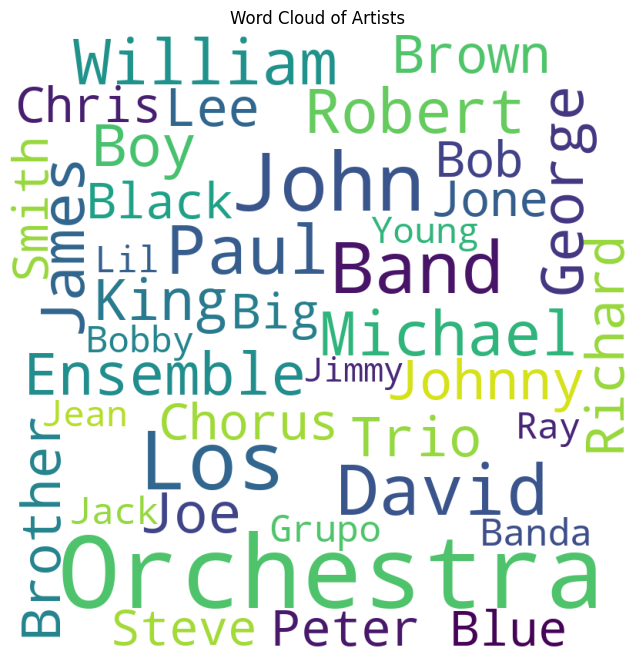

In [134]:
# Plot the word cloud of the artists: plt.imshow(wordcloud).
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of Artists")
plt.show()

In [135]:
# Identify the top 10 artists with the most songs produced and display the count and artist name: 
# top10_most_song_produced_artists[['count','artists']].sort_values('count', ascending=False).
top_10_artists_most_songs = artist_data.sort_values('count', ascending=False).head(10)
print(top_10_artists_most_songs[['count', 'artists']].sort_values('count', ascending=False))


       count            artists
8367    3169   Francisco Canaro
28561   2422   Эрнест Хемингуэй
28560   2136  Эрих Мария Ремарк
8434    1459      Frank Sinatra
10714   1256    Ignacio Corsini
27109   1200  Vladimir Horowitz
1682    1146   Arturo Toscanini
2707    1103     Billie Holiday
12378   1061        Johnny Cash
7426    1023      Elvis Presley


In [136]:
# Identify the top 10 artists with the highest popularity score and display the popularity score and artist name: 
# top10_popular_artists[['popularity','artists']].sort_values('popularity', ascending=False).
top_10_artist_high_popularity = artist_data.sort_values('popularity', ascending=False).head(10)
print(top_10_artist_high_popularity[['popularity', 'artists']].sort_values('popularity', ascending=False))

       popularity          artists
20966        93.0      Ritt Momney
14354        92.0        Lele Pons
15070        90.0  Los Legendarios
11764        89.0         Jerry Di
7463         88.0           Emilee
28263        88.0      salem ilese
23687        88.0        Surf Mesa
213          87.0              A7S
14378        86.0     Lenny Santos
16453        86.0        Master KG



- data is a dataset containing information about tracks, artists, and genres.
- yaer_data is a dataset containing information about tracks over the years.
- artist_data is a dataset containing information about artists.
- genre_data is a dataset containing information about genres.

We found similarity between the datasets, the same column on each data
We can :
- Merge the data using the 'artists' column to find the relationship between the artists and genres.
- Merge the artist_data and genre_data on the 'artists' column: artist_genre_data.

we can have one big data 
we can use sql server or other app to view and manage a relation between tables
